In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np

import amrex.space3d as amr
import impactx
from impactx import ImpactX, RefPart, distribution, elements

In [2]:
pp_amr = amr.ParmParse("amr")
pp_amr.add("max_level", 1)
pp_amr.addarr("n_cell", [32, 32, 32])

In [3]:
sim = ImpactX()

MPI initialized with 1 MPI processes
MPI initialized with thread support level 3
OMP initialized with 20 OMP threads
AMReX (23.05-27-gd65dd906bd53) initialized


hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).


In [4]:
sim.particle_shape = 2  # B-spline order
sim.space_charge = True
sim.dynamic_size = True
sim.prob_relative = [3.0, 1.1]
sim.diagnostics = False

In [5]:
sim.domain

<amrex.RealBox (RealBox -1 1 -1 1 -1 1 )>

In [6]:
#sim.domain = amr.RealBox((-15e-4, -15e-4, -3e-6), (15e-4,  15e-4,  3e-6))
#sim.domain

In [7]:
sim.init_grids()

+++++++
lev=0 dom=((0,0,0) (31,31,31) (0,0,0)) smallEnd=(0,0,0) n_cell_nup=(29.25714286,29.25714286,29.25714286) fine_tag_lo=(8,8,8) fine_tag_hi=(24,24,24) (7.314285714,7.314285714,7.314285714)--------
+++++++
lev=0 dom=((0,0,0) (31,31,31) (0,0,0)) smallEnd=(0,0,0) n_cell_nup=(29.25714286,29.25714286,29.25714286) fine_tag_lo=(8,8,8) fine_tag_hi=(24,24,24) (7.314285714,7.314285714,7.314285714)--------
boxArray(0) (BoxArray maxbox(1)
       m_ref->m_hash_sig(0)
       ((0,0,0) (31,31,31) (0,0,0)) )


Grids Summary:
  Level 0   1 grids  32768 cells  100 % of domain
  Level 1   8 grids  196608 cells  75 % of domain
            smallest grid: 32 x 32 x 16  biggest grid: 32 x 32 x 32



In [8]:
# load a 2 GeV electron beam with an initial
# unnormalized rms emittance of 2 nm
energy_MeV = 250  # reference energy
bunch_charge_C = 1.0e-9  # used with space charge
npart = 10000  # number of macro particles

#   reference particle
ref = sim.particle_container().ref_particle()
ref.set_charge_qe(-1.0).set_mass_MeV(0.510998950).set_energy_MeV(energy_MeV)

#   particle bunch
distr = distribution.Waterbag(
    sigmaX=4.472135955e-4,
    sigmaY=4.472135955e-4,
    sigmaT=9.12241869e-7,
    sigmaPx=0.0,
    sigmaPy=0.0,
    sigmaPt=0.0,
)
sim.add_particles(bunch_charge_C, distr, npart)

lev=0 frac=3 rb=(RealBox -0.003572766257 0.003582550589 -0.003531728341 0.00356912951 -7.441802258e-06 7.349719747e-06 )
lev=1 frac=1.1 rb=(RealBox -0.001306915922 0.001316700255 -0.001283123355 0.001320524524 -2.757820289e-06 2.665737779e-06 )
lev=0 rb=(RealBox -0.003572766257 0.003582550589 -0.003531728341 0.00356912951 -7.441802258e-06 7.349719747e-06 )
lev=1 rb=(RealBox -0.001306915922 0.001316700255 -0.001283123355 0.001320524524 -2.757820289e-06 2.665737779e-06 )


In [9]:
beam = sim.particle_container()
beam.min_and_max_positions()

(-0.0011876606414754846,
 -0.0011647757239927115,
 -2.5112949227266403e-06,
 0.0011974449740026702,
 0.0012021768930414606,
 2.4192124121423437e-06)

In [10]:
# design the accelerator lattice
sim.lattice.append(elements.Drift(ds=6.0, nslice=1))

In [11]:
# run simulation
sim.evolve()

 Diagnostics: 0
 Space Charge effects: 1
 ++++ Starting global_step=1 slice_step=0
lev=0 frac=3 rb=(RealBox -0.003572766257 0.003582550589 -0.003531728341 0.00356912951 -7.349704456e-06 7.441786775e-06 )
lev=1 frac=1.1 rb=(RealBox -0.001306915922 0.001316700255 -0.001283123355 0.001320524524 -2.665732233e-06 2.757814552e-06 )
lev=0 rb=(RealBox -0.003572766257 0.003582550589 -0.003531728341 0.00356912951 -7.349704456e-06 7.441786775e-06 )
lev=1 rb=(RealBox -0.001306915922 0.001316700255 -0.001283123355 0.001320524524 -2.665732233e-06 2.757814552e-06 )
MLMG: Initial rhs               = 4.899155401e+13
MLMG: Initial residual (resid0) = 4.899155401e+13
MLMG: Final Iter. 4 resid, resid/bnorm = 4802417.885, 9.802542463e-08
MLMG: Timers: Solve = 0.018426022 Iter = 0.017078082 Bottom = 0.001598972
MLMG: Initial rhs               = 1.08337308e+14
MLMG: Initial residual (resid0) = 6.750161984e+14
MLMG: Final Iter. 5 resid, resid/bnorm = 460175.4883, 4.247617898e-09
MLMG: Timers: Solve = 0.064529

In [12]:
pc = sim.particle_container()
pc.TotalNumberOfParticles()
# should be 10k if the box is not cut

10000

In [13]:
rho = sim.rho(lev=0)
rho.size

1

In [14]:
rho = sim.rho(lev=1)
rho.size

8

In [15]:
beam = sim.particle_container()
beam.min_and_max_positions()

(-0.0058776590695574105,
 -0.005885863352659697,
 -0.00012525750736802542,
 0.006501393975646959,
 0.006177932525801883,
 2.2906368149095817e-05)

In [16]:
sim.resize_mesh()

lev=0 frac=3 rb=(RealBox -0.01825671211 0.01888044702 -0.01794965923 0.0182417284 -0.0002734213829 0.0001710702437 )
lev=1 frac=1.1 rb=(RealBox -0.006496611722 0.007120346628 -0.006489053147 0.00678112232 -0.0001326657011 3.031456192e-05 )
lev=0 rb=(RealBox -0.01825671211 0.01888044702 -0.01794965923 0.0182417284 -0.0002734213829 0.0001710702437 )
lev=1 rb=(RealBox -0.006496611722 0.007120346628 -0.006489053147 0.00678112232 -0.0001326657011 3.031456192e-05 )


In [17]:
for lev in range(sim.finest_level + 1):
    print(lev)
    gm = sim.Geom(lev=lev)
    print(gm.ProbDomain())
    dm = gm.Domain()
    print(dm, dm.size[2])

0
<amrex.RealBox (RealBox -0.0182567 0.0188804 -0.0179497 0.0182417 -0.000273421 0.00017107 )>
<amrex.Box of size '(32,32,32)'> 32
1
<amrex.RealBox (RealBox -0.00649661 0.00712035 -0.00648905 0.00678112 -0.000132666 3.03146e-05 )>
<amrex.Box of size '(64,64,64)'> 64


In [18]:
def plot_rho(lev):
    rho = sim.rho(lev=lev)

    gm = sim.Geom(lev=lev)
    dm = gm.Domain()
    dr = gm.data().CellSize()
    dV = np.prod(dr)
    
    rs = rho.sum_unique(comp=0, local=False)
    beam_charge = dV * rs  # in C
    print(f"beam_charge={beam_charge}")

    half_z = dm.size[2] // 2  # order: x,y,z
    # lvl 0 only:
    # half_z = sim.n_cell[2] // 2  # order: x,y,z

    ng = rho.nGrowVect
    print(f"ng={ng}")
    save_png = False
    for mfi in rho:
        f = plt.figure()
        ax = f.gca()
        bx = mfi.validbox()
        print(f"bx={bx}")
        rbx = amr.RealBox(bx, dr, gm.ProbLo())
        print(rbx)

        arr = rho.array(mfi)
        arr_np = np.array(arr, copy=False)  # indices: comp, z, y, x

        # shift box to zero-based local mfi index space
        half_z_local = half_z - bx.lo_vect[2]
        bx.shift(bx.lo_vect * -1)
        # check if the current tile contains the half-z plane
        if half_z_local < 0 or half_z_local > arr_np.shape[2]:
            continue

        comp = 0
        mu = 1.0e6  # m->mu
        im = ax.imshow(
            # arr_np[comp, half_z, ...] * dV,  # including guard
            arr_np[comp, half_z_local, ng[1] : -ng[1], ng[0] : -ng[0]]
            * dV,  # w/o guard
            origin="lower",
            aspect="auto",
            extent=[rbx.lo(0) * mu, rbx.hi(0) * mu, rbx.lo(1) * mu, rbx.hi(1) * mu],
        )
        cb = f.colorbar(im)
        cb.set_label(r"charge density  [C/m$^3$]")
        ax.set_xlabel(r"$x$  [$\mu$m]")
        ax.set_ylabel(r"$y$  [$\mu$m]")
        #if save_png:
        #    plt.savefig("charge_deposition.png")
        #else:
        #    plt.show()

beam_charge=-1.5958336787087244e-05
ng=<amrex.IntVect (2,2,2)>
bx=<amrex.Box of size '(33,33,33)'>
<amrex.RealBox (RealBox -0.0182567 0.0188804 -0.0179497 0.0182417 -0.000273421 0.00017107 )>


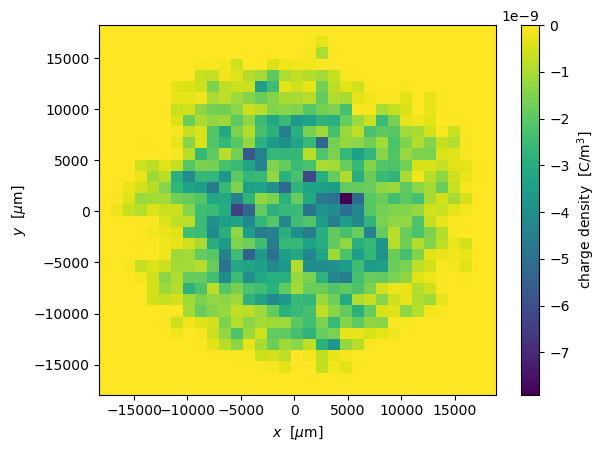

In [19]:
plot_rho(lev=0)

beam_charge=-7.86107802050322e-07
ng=<amrex.IntVect (2,2,2)>
bx=<amrex.Box of size '(33,33,33)'>
<amrex.RealBox (RealBox -0.00649661 0.000311867 -0.00648905 0.000146035 -0.000112293 -3.0803e-05 )>
bx=<amrex.Box of size '(33,33,33)'>
<amrex.RealBox (RealBox 0.000311867 0.00712035 -0.00648905 0.000146035 -0.000112293 -3.0803e-05 )>
bx=<amrex.Box of size '(33,33,33)'>
<amrex.RealBox (RealBox -0.00649661 0.000311867 0.000146035 0.00678112 -0.000112293 -3.0803e-05 )>
bx=<amrex.Box of size '(33,33,33)'>
<amrex.RealBox (RealBox 0.000311867 0.00712035 0.000146035 0.00678112 -0.000112293 -3.0803e-05 )>
bx=<amrex.Box of size '(33,33,17)'>
<amrex.RealBox (RealBox -0.00649661 0.000311867 -0.00648905 0.000146035 -3.0803e-05 9.94203e-06 )>
bx=<amrex.Box of size '(33,33,17)'>
<amrex.RealBox (RealBox 0.000311867 0.00712035 -0.00648905 0.000146035 -3.0803e-05 9.94203e-06 )>
bx=<amrex.Box of size '(33,33,17)'>
<amrex.RealBox (RealBox -0.00649661 0.000311867 0.000146035 0.00678112 -3.0803e-05 9.94203e-06

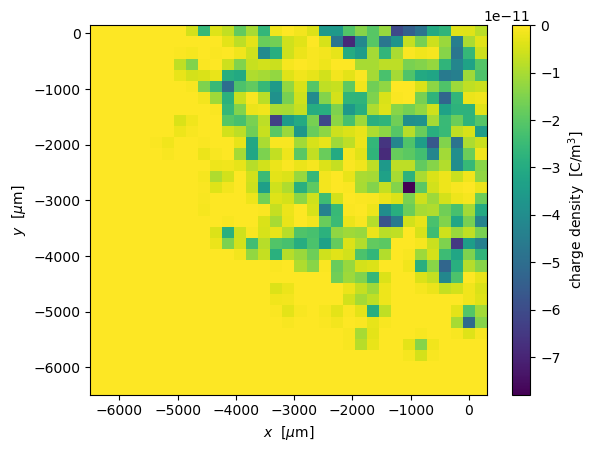

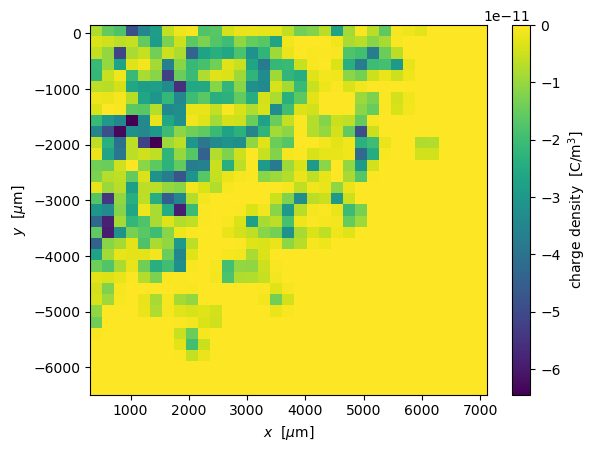

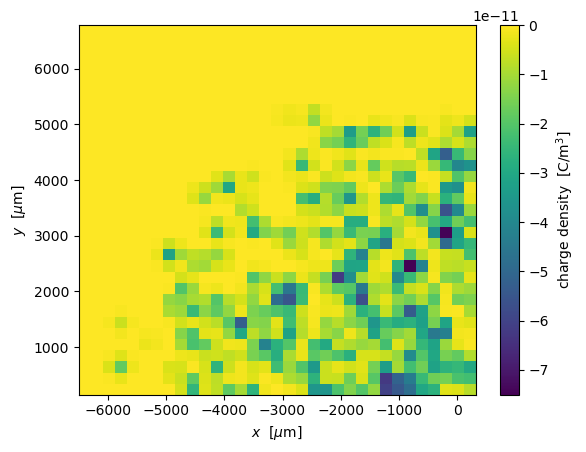

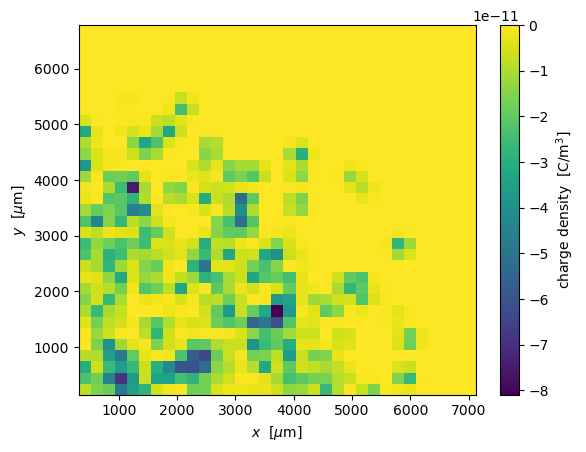

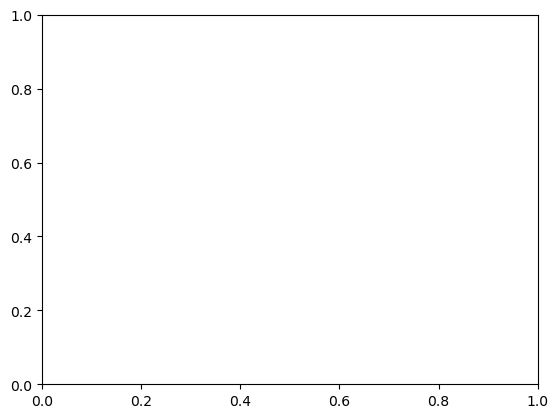

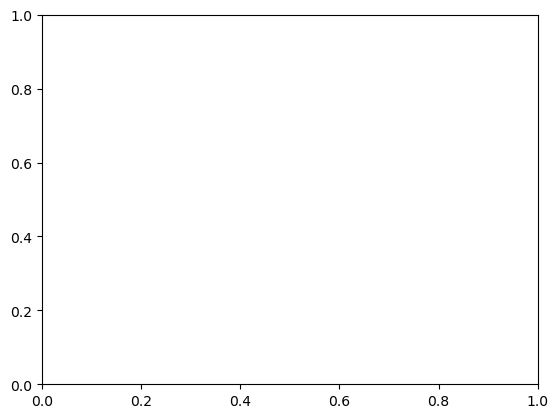

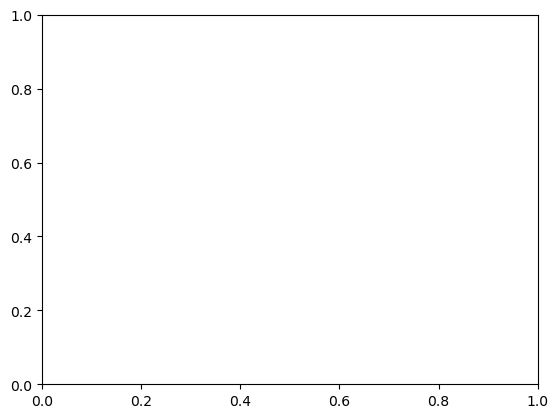

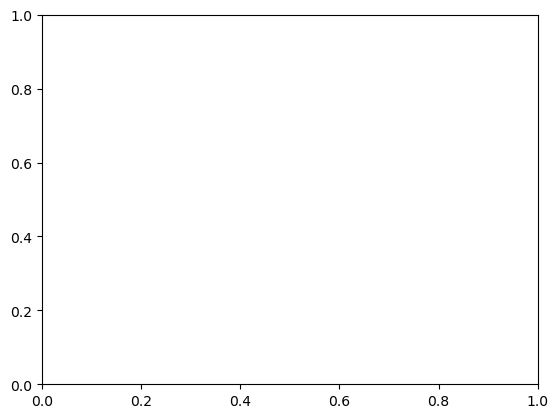

In [20]:
plot_rho(lev=1)